# 实验2 决策树

### 一、实验目的

掌握决策树算法的原理与应用，熟悉Scikit-learn中决策树算法的使用。  

### 二、实验内容

####  1. Scikit-learn中决策树算法的使用 

#### （1）Scikit-learn决策树算法类库介绍  
   Scikit-Learn决策树算法类库内部实现是使用了调优过的CART树算法，既可以做分类，又可以做回归。分类决策树的类对应的是DecisionTreeClassifier，而回归决策树的类对应的是DecisionTreeRegressor。本节主要介绍分类决策树类DecisionTreeClassifier，回归决策树请见手册（https://scikit-learn.org/0.20/modules/tree.html#regression）。
   
####  *  DecisionTreeClassifier函数
   
   class sklearn.tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)
   
   主要参数：
   
   1）criterion—特征选择标准：可以使用"gini"或者"entropy"，前者代表基尼系数，后者代表信息增益。默认为基尼系数"gini"，对应CART算法。信息增益"entropy"对应ID3, C4.5的最优特征选择方法。Scikit-Learn中决策树使用的是 CART 算法的优化版本，仅生成二叉树。
   
   2）max_depth—决策树最大深：默认可以不输入，值为None，决策树在建立子树的时候不会限制子树的深度。常用的可以取值10-100之间。
   
   3）min_samples_split—节点分裂前所需最小样本数：这个值限制了子树继续划分的条件，如果某节点的样本数少于min_samples_split，则不会继续再尝试选择最优特征来进行划分。 默认是2。
   
   4）min_samples_leaf—叶子节点最少样本数：这个值限制了叶子节点最少的样本数，如果某叶子节点数目小于样本数，则会和兄弟节点一起被剪枝。 默认是1,可以输入最少的样本数的整数，或者最少样本数占样本总数的百分比。
 
 Scikit-Learn中决策树函数不包含剪枝算法，可以通过2）、3）、4）等超参数来达到剪枝效果，避免过拟合。



#### （2）鸢尾花数据决策树分类面  


Data Set Characteristics:（详见https://scikit-learn.org/0.20/datasets/index.html#iris-plants-dataset）

 *  Number of Instances: 
150 (50 in each of three classes)

* Number of Attributes: 
4 numeric, predictive attributes and the class

* Attribute Information: 
sepal length，
sepal width，
petal length，
petal width in cm

* class:
Iris-Setosa，
Iris-Versicolour，
Iris-Virginica

1）载入数据：

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

2）参数设置

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

3） 决策树训练、预测与绘图

/tmp/ipykernel_14853/12073162.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],


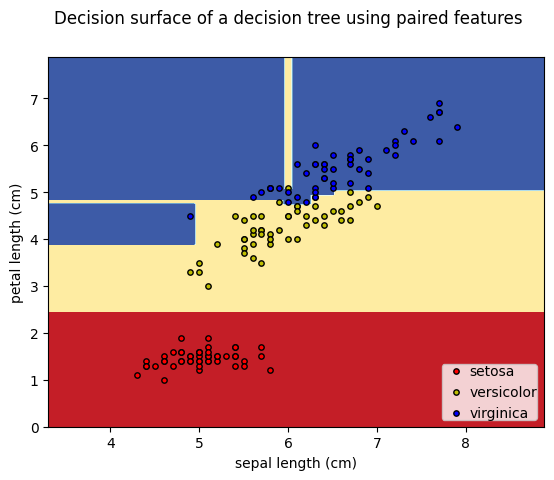

In [3]:

# 分组选取两个属性组合
pair = [0, 2]
X = iris.data[:, pair]
y = iris.target

# 训练
clf = DecisionTreeClassifier().fit(X, y)

# 预测于边界绘制

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
#plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])

# 绘制训练样本点
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

4） 观察决策树结构

   DecisionTreeClassifier有属性tree_ （Tree object）包含决策树的结构属性，例如：
   
- node_count，number of the node

- left_child, id of the left child of the node
 
 - right_child, id of the right child of the node
 
 - feature, feature used for splitting the node
 
 - threshold, threshold value at the node

In [4]:
clf.tree_.node_count
clf.tree_.children_left

array([ 1, -1,  3,  4,  5, -1, -1, -1,  9, 10, 11, 12, 13, -1, -1, 16, -1,
       -1, -1, -1, 21, 22, -1, -1, -1], dtype=int64)

![](https://ai-studio-static-online.cdn.bcebos.com/0abf8961b910462cb8df22a7866c1dbc49d3205642b0430db64e1c5788f41493)

#### （3）剪枝实现

将数据集分为训练集和测试集，使用 train_test_split()函数（详见https://scikit-learn.org/0.20/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split）

In [5]:
#函数参考
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

观察得到的决策树结构，并使用DecisionTreeClassifier.score(X,y)得到测试集的分类精度。

In [6]:
estimator = DecisionTreeClassifier(min_samples_leaf=3, random_state=0)
estimator.fit(X_train, y_train)
estimator.score(X_test, y_test)

0.9736842105263158

### 实验与讨论
* 结合（2）中的程序，参考Scikit-Learn手册中的例程（https://scikit-learn.org/0.20/auto_examples/tree/plot_iris.html#sphx-glr-auto-examples-tree-plot-iris-py），绘制不同2属性组合下决策树分类面。
* 选择不同DecisionTreeClassifier函数参赛，比较得到的决策树的结构与分类性能（至少三组）。

/tmp/ipykernel_14853/3006153737.py:54: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/tmp/ipykernel_14853/3006153737.py:54: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/tmp/ipykernel_14853/3006153737.py:54: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],


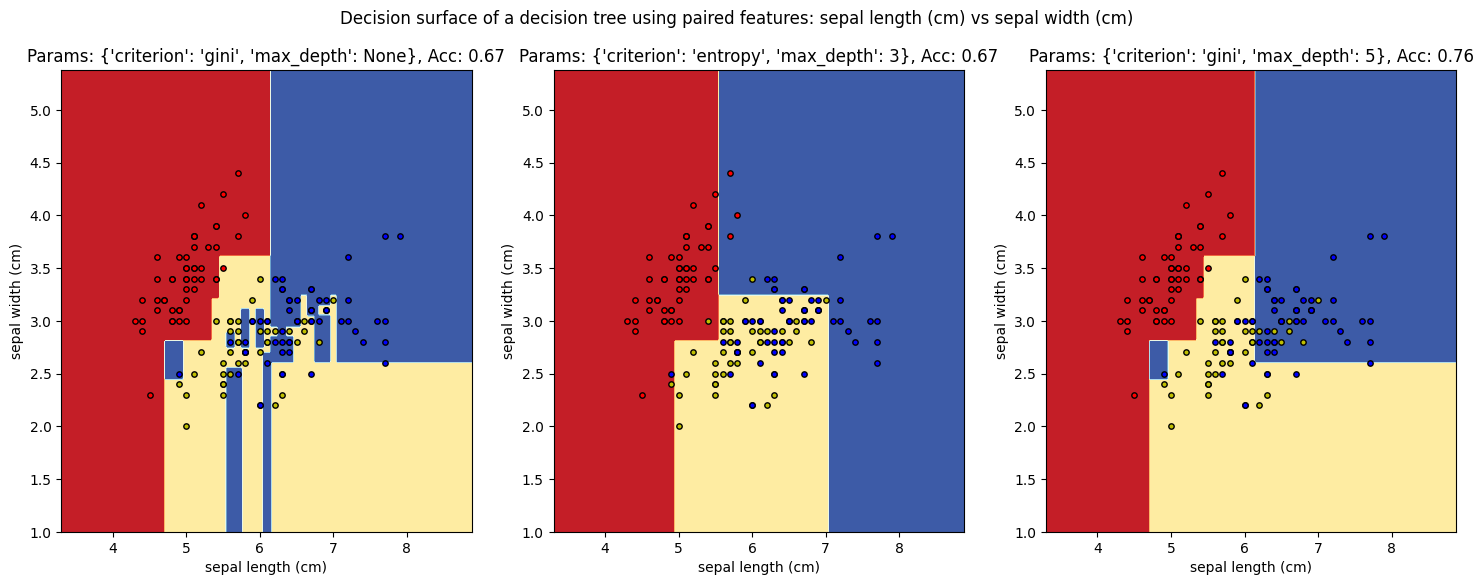

/tmp/ipykernel_14853/3006153737.py:54: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/tmp/ipykernel_14853/3006153737.py:54: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/tmp/ipykernel_14853/3006153737.py:54: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],


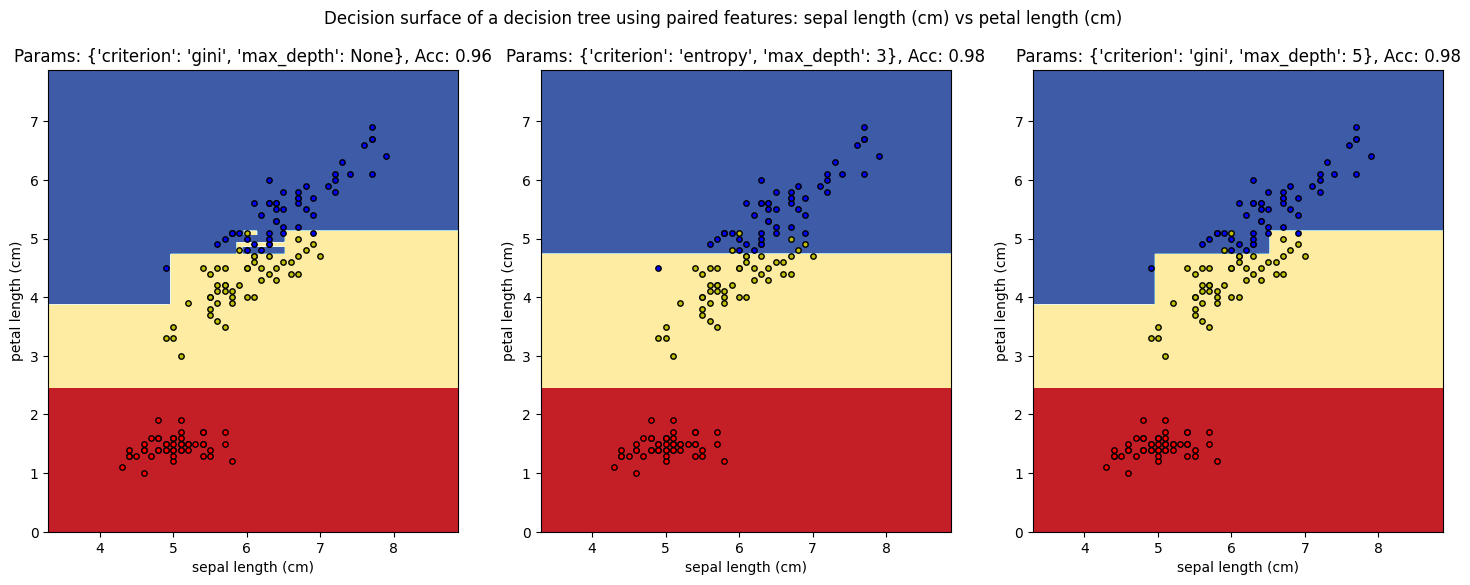

/tmp/ipykernel_14853/3006153737.py:54: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/tmp/ipykernel_14853/3006153737.py:54: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/tmp/ipykernel_14853/3006153737.py:54: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],


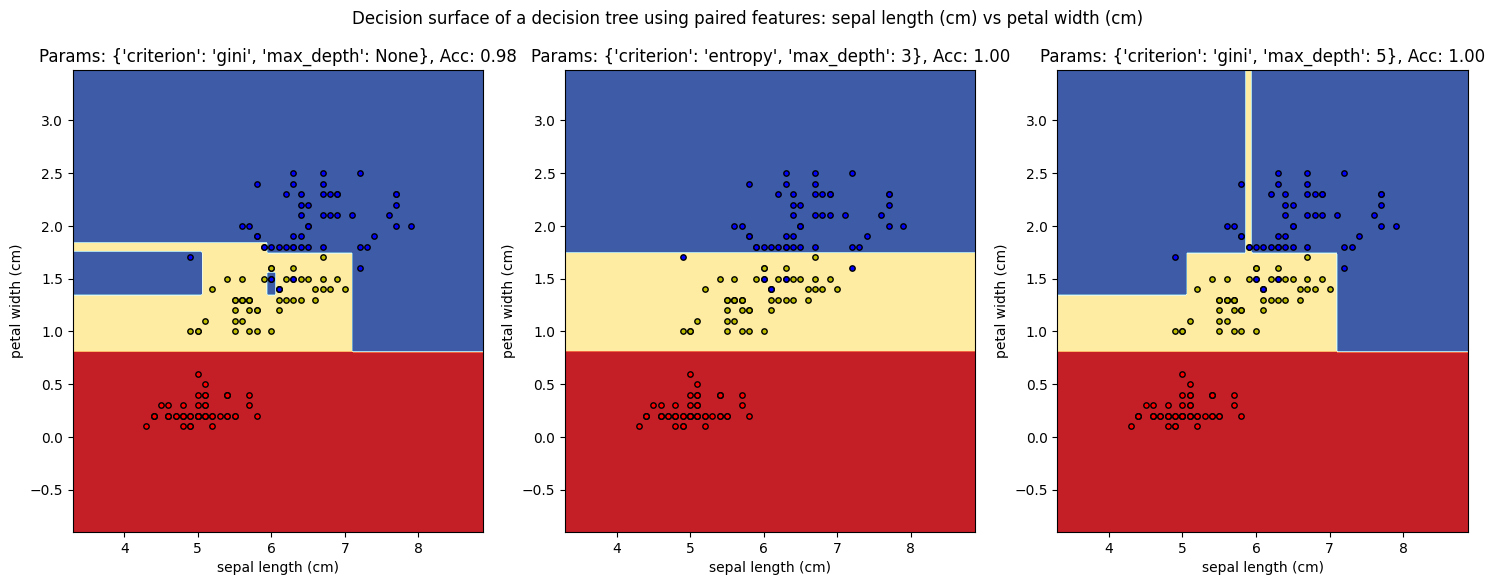

/tmp/ipykernel_14853/3006153737.py:54: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/tmp/ipykernel_14853/3006153737.py:54: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/tmp/ipykernel_14853/3006153737.py:54: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],


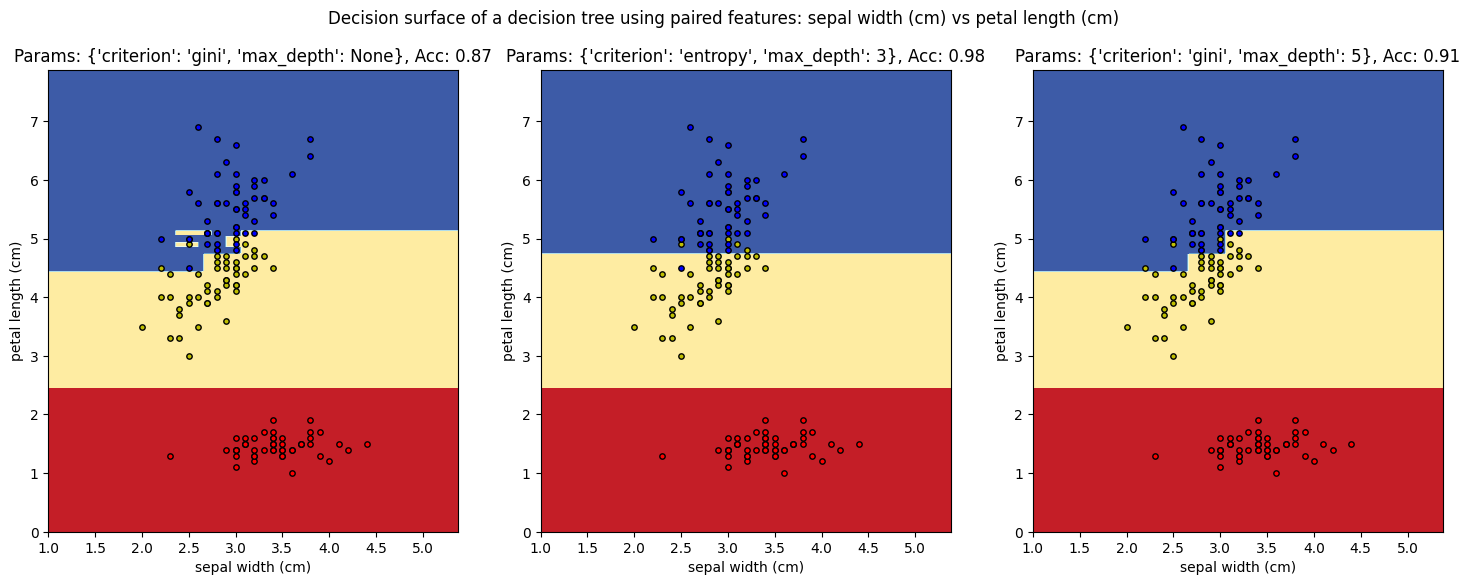

/tmp/ipykernel_14853/3006153737.py:54: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/tmp/ipykernel_14853/3006153737.py:54: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/tmp/ipykernel_14853/3006153737.py:54: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],


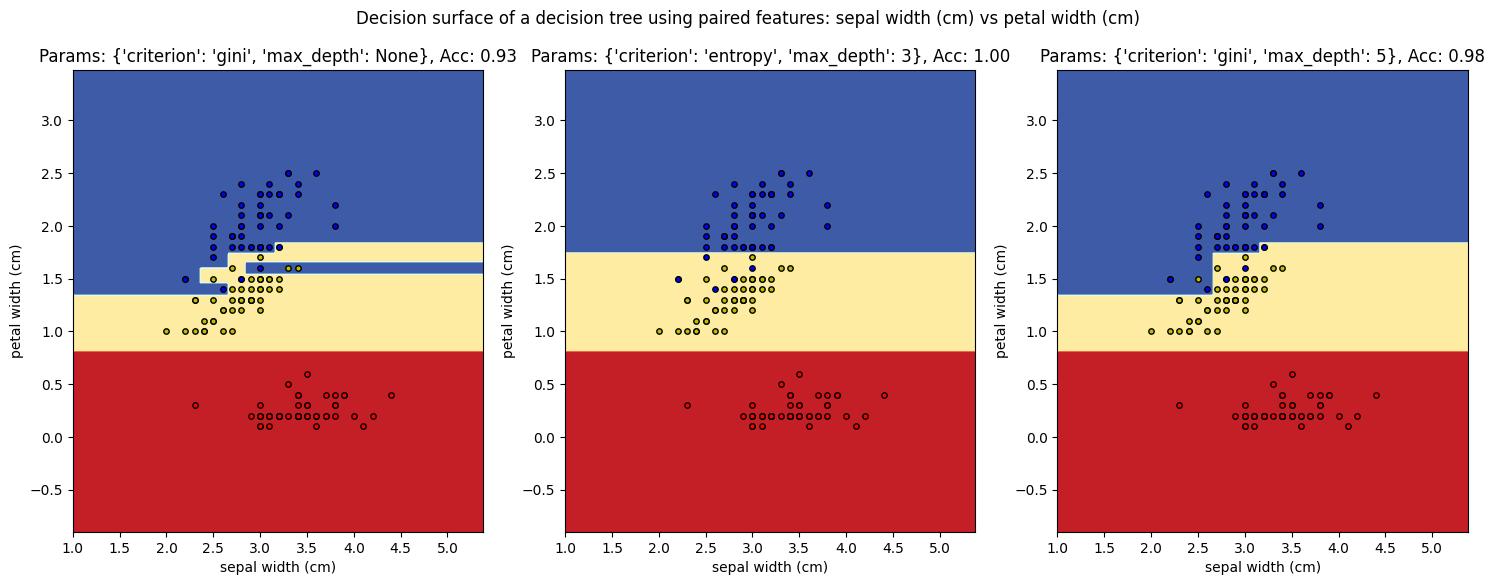

/tmp/ipykernel_14853/3006153737.py:54: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/tmp/ipykernel_14853/3006153737.py:54: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/tmp/ipykernel_14853/3006153737.py:54: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],


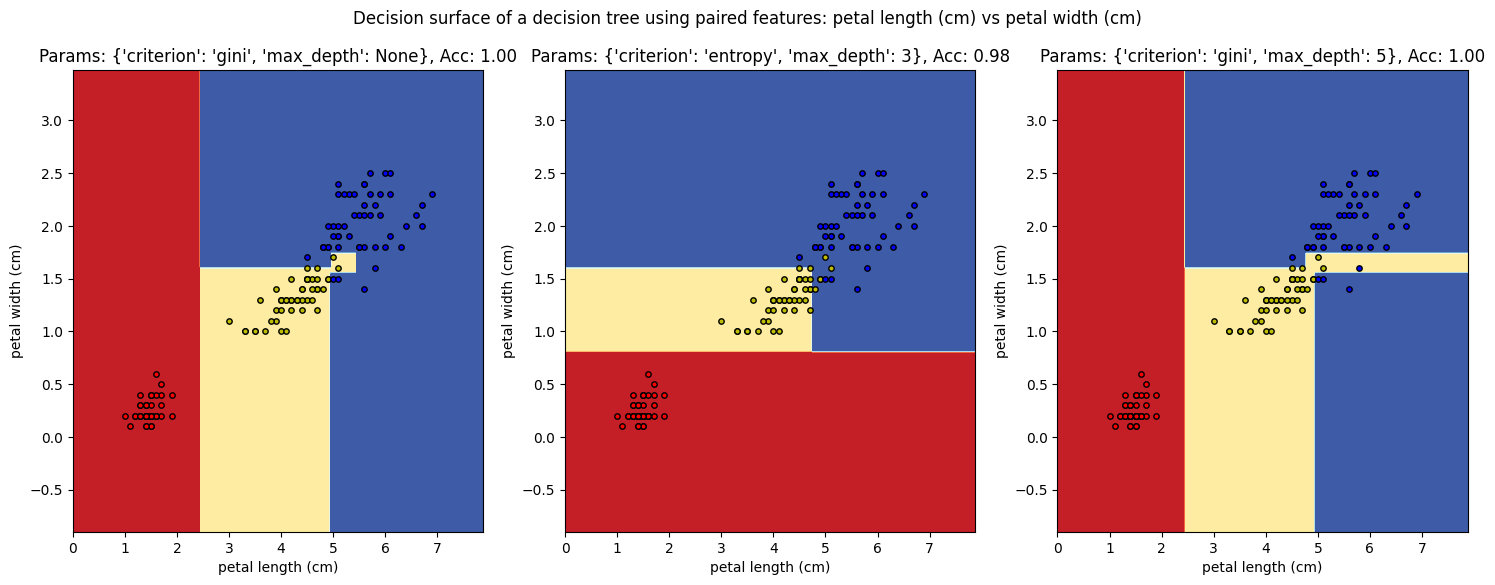

In [7]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 加载鸢尾花数据集
iris = load_iris()
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# 定义不同的参数组合
param_sets = [
    {'criterion': 'gini', 'max_depth': None},
    {'criterion': 'entropy', 'max_depth': 3},
    {'criterion': 'gini', 'max_depth': 5}
]

# 遍历所有可能的2属性组合
for pair_index, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target

    plt.figure(figsize=(18, 6))
    for param_index, params in enumerate(param_sets):
        # 划分训练集和测试集
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # 训练决策树
        clf = DecisionTreeClassifier(**params).fit(X_train, y_train)

        # 预测
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # 绘制决策面
        plt.subplot(1, len(param_sets), param_index + 1)
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

        plt.xlabel(iris.feature_names[pair[0]])
        plt.ylabel(iris.feature_names[pair[1]])

        # 绘制训练点
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

        plt.title(f"Params: {params}, Acc: {accuracy:.2f}")

    plt.suptitle(f"Decision surface of a decision tree using paired features: {iris.feature_names[pair[0]]} vs {iris.feature_names[pair[1]]}")
    plt.show()


#### 2. ID3算法实现（拓展）
  参考下面程序，实现ID3算法，完成教材习题4.3。

In [8]:
import numpy as np
import pandas as pd
from math import log

 #计算数据集的香农熵
def calcShannonEnt(dataSet):
     numEntries=len(dataSet)
     labelCounts={}
     #给所有可能分类创建字典
     for featVec in dataSet:
         currentLabel=featVec[-1]
         if currentLabel not in labelCounts.keys():
             labelCounts[currentLabel]=0
         labelCounts[currentLabel]+=1
     shannonEnt=0.0    
             #以2为底数计算香农熵
     for key in labelCounts:
                 prob = float(labelCounts[key])/numEntries
                 shannonEnt-=prob*log(prob,2)
     return shannonEnt
 
#对离散变量划分数据集，取出该特征取值为value的所有样本
def splitDataSet(dataSet,axis,value):
    retDataSet=[]
    for featVec in dataSet:
        if featVec[axis]==value:
            reducedFeatVec=featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

#对连续变量划分数据集，direction规定划分的方向，
#决定是划分出小于value的数据样本还是大于value的数据样本集
def splitContinuousDataSet(dataSet,axis,value,direction):
    retDataSet=[]
    for featVec in dataSet:
        if direction==0:
            if featVec[axis]>value:
                reducedFeatVec=featVec[:axis]
                reducedFeatVec.extend(featVec[axis+1:])
                retDataSet.append(reducedFeatVec)
        else:
            if featVec[axis]<=value:
                reducedFeatVec=featVec[:axis]
                reducedFeatVec.extend(featVec[axis+1:])
                retDataSet.append(reducedFeatVec)
    return retDataSet

#选择最好的数据集划分方式
def chooseBestFeatureToSplit(dataSet,labels):
    numFeatures=len(dataSet[0])-1
    baseEntropy=calcShannonEnt(dataSet)
    bestInfoGain=0.0
    bestFeature=-1
    bestSplitDict={}
    for i in range(numFeatures):
        featList=[example[i] for example in dataSet]
        #对连续型特征进行处理 
        if type(featList[0]).__name__=='float' or type(featList[0]).__name__=='int':
            #产生n-1个候选划分点
            sortfeatList=sorted(featList)
            splitList=[]
            for j in range(len(sortfeatList)-1):
                splitList.append((sortfeatList[j]+sortfeatList[j+1])/2.0)
            bestSplitEntropy=10000
            slen=len(splitList)
            #求用第j个候选划分点划分时，得到的信息熵，并记录最佳划分点
            for j in range(slen):
                value=splitList[j]
                newEntropy=0.0
                subDataSet0=splitContinuousDataSet(dataSet,i,value,0)
                subDataSet1=splitContinuousDataSet(dataSet,i,value,1)
                prob0=len(subDataSet0)/float(len(dataSet))
                newEntropy+=prob0*calcShannonEnt(subDataSet0)
                prob1=len(subDataSet1)/float(len(dataSet))
                newEntropy+=prob1*calcShannonEnt(subDataSet1)
                if newEntropy<bestSplitEntropy:
                    bestSplitEntropy=newEntropy
                    bestSplit=j 
            #用字典记录当前特征的最佳划分点
            bestSplitDict[labels[i]]=splitList[bestSplit]
            infoGain=baseEntropy-bestSplitEntropy
        #对离散型特征进行处理
        else:
            uniqueVals=set(featList)
            newEntropy=0.0
            #计算该特征下每种划分的信息熵 
            for value in uniqueVals:
                subDataSet=splitDataSet(dataSet,i,value)
                prob=len(subDataSet)/float(len(dataSet))
                newEntropy+=prob*calcShannonEnt(subDataSet)
            infoGain=baseEntropy-newEntropy
        if infoGain>bestInfoGain:
            bestInfoGain=infoGain
            bestFeature=i
    #若当前节点的最佳划分特征为连续特征，则将其以之前记录的划分点为界进行二值化处理 
    #即是否小于等于bestSplitValue
    if type(dataSet[0][bestFeature]).__name__=='float' or type(dataSet[0][bestFeature]).__name__=='int':
              bestSplitValue=bestSplitDict[labels[bestFeature]]
              labels[bestFeature]=labels[bestFeature]+'<='+str(bestSplitValue)
              for i in range(np.shape(dataSet)[0]):
                  if dataSet[i][bestFeature]<=bestSplitValue:
                      dataSet[i][bestFeature]=1
                  else:
                      dataSet[i][bestFeature]=0
    return bestFeature

#特征若已经划分完，节点下的样本还没有统一取值，则需要进行投票
def majorityCnt(classList):
    classCount={}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote]=0
        classCount[vote]+=1
    return max(classCount)

#主程序，递归产生决策树
def createTree(dataSet,labels,data_full,labels_full):
    classList=[example[-1] for example in dataSet]
    if classList.count(classList[0])==len(classList):
        return classList[0]
    if len(dataSet[0])==1:
        return majorityCnt(classList)
    bestFeat=chooseBestFeatureToSplit(dataSet,labels)
    bestFeatLabel=labels[bestFeat]
    myTree={bestFeatLabel:{}}
    featValues=[example[bestFeat] for example in dataSet]
    uniqueVals=set(featValues)
    if type(dataSet[0][bestFeat]).__name__=='str':
        currentlabel=labels_full.index(labels[bestFeat])
        featValuesFull=[example[currentlabel] for example in data_full]
        uniqueValsFull=set(featValuesFull)
        del(labels[bestFeat])
        #针对bestFeat的每个取值，划分出一个子树。
        for value in uniqueVals:
            subLabels=labels[:]
            if type(dataSet[0][bestFeat]).__name__=='str':
                uniqueValsFull.remove(value)
                myTree[bestFeatLabel][value]=createTree(splitDataSet\
                      (dataSet,bestFeat,value),subLabels,data_full,labels_full)
        if type(dataSet[0][bestFeat]).__name__=='str':
            for value in uniqueValsFull:
                myTree[bestFeatLabel][value]=majorityCnt(classList)
    return myTree

In [9]:
# main()
df=pd.read_csv('DT_4_3-en.csv')
data=df.values[:,1:].tolist()
data_full=data[:]
labels=df.columns.values[1:-1].tolist()
labels_full=labels[:]
bestTree=createTree(data,labels,data_full,labels_full)
print(bestTree)

{'texture': {'MoHu': 0, 'ShaoHu': {'touch': {'RuanNian': 1, 'YingHua': 0}}, 'QingXi': {'density<=0.3815': {}}}}


### 三、实验结果与分析

（请给出实验内容中“实验与讨论”中的结果及其分析。）



